<a href="https://colab.research.google.com/github/IreneGallini/ML-algorithms-from-scratch/blob/main/Linear_regression_from_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in dataset to train our model

In [4]:
training_set= pd.read_csv("tvmarketing.csv")
x_train = training_set["TV"].values
y_train = training_set["Sales"].values

Scatterplot

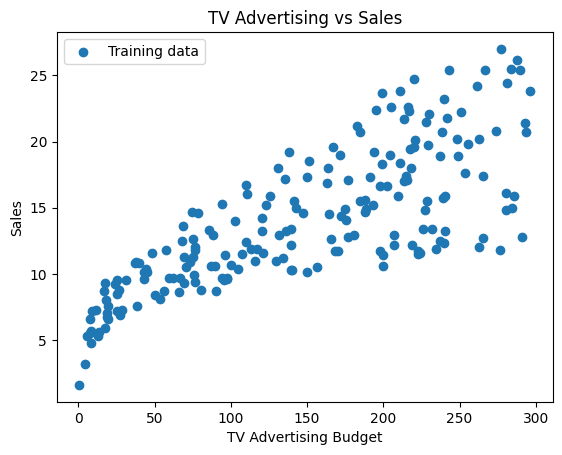

In [6]:
plt.scatter(x_train, y_train, label='Training data')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()

Implementation
1) Cost Funtion: using *Mean Squared Error (MSE)*
2) Gradent Function: compute *derivatives* of the cost function
3) Gradient Descent Function: use gradient function to update our parameters over a number of iterations

Step 1: Cost function

In [28]:
def cost_function(x, y, w, b):
    m=len(x) # number of training examples
    cost_sum=0 # accumulate total error over all training examples

    for i in range(m): #loop over all training examples
        f = w * x[i] + b # predicted value
        cost = (f - y[i]) ** 2 # compute the squared error
        cost_sum += cost # add cost of each data point to accumulate total cost
    
    total_cost = cost_sum / (2 * m) # average cost
    return total_cost #return mean squared error

Step 2: Gradient function

In [29]:
#Calculate gradients of the cost function with respect to w and b
def gradient_function (x, y, w, b):
    m = len(x) # number of training examples
    dc_dw = 0 # derivative w.r.t. w  
    dc_db = 0 # derivative w.r.t. b

    for i in range(m): # loop over all training examples
        f = w * x[i] + b # predicted value
        dc_dw += (f - y[i]) * x[i] # accumulate gradient w.r.t. w
        dc_db += (f - y[i]) # accumulate gradient w.r.t. b
    
    dc_dw /= m # average gradient w.r.t. w
    dc_db /= m # average gradient w.r.t. b
    return dc_dw, dc_db # return gradients            

Step 3: Gradient descent function

In [92]:
def gradient_descent(x, y, w, b, learning_rate, num_iterations):
    for i in range(num_iterations): # loop for a number of iterations
        dc_dw, dc_db = gradient_function(x, y, w, b) # compute gradients
        w -= learning_rate * dc_dw # update w
        b -= learning_rate * dc_db # update b
        if i % 100 == 0: # print cost every 100 iterations
            cost = cost_function(x, y, w, b)
            print(f"Iteration {i}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b
#Cost goes down each iteration
#Reach minimum cost -> best possible values for w and b

In [107]:
# Run it
learning_rate = 0.00005
num_iterations = 1000
final_w, final_b = gradient_descent(x_train, y_train, 0, 0, learning_rate, num_iterations)
print(f"Final parameters: w = {final_w:.4f}, b = {final_b:.4f}")

Iteration 0: Cost = 31.6409, w = 0.1205, b = 0.0007
Iteration 100: Cost = 11.5030, w = 0.0832, b = 0.0094
Iteration 200: Cost = 11.4872, w = 0.0832, b = 0.0183
Iteration 300: Cost = 11.4715, w = 0.0831, b = 0.0272
Iteration 400: Cost = 11.4558, w = 0.0831, b = 0.0360
Iteration 500: Cost = 11.4401, w = 0.0830, b = 0.0449
Iteration 600: Cost = 11.4244, w = 0.0830, b = 0.0537
Iteration 700: Cost = 11.4088, w = 0.0829, b = 0.0626
Iteration 800: Cost = 11.3933, w = 0.0829, b = 0.0714
Iteration 900: Cost = 11.3777, w = 0.0828, b = 0.0802
Final parameters: w = 0.0828, b = 0.0889


Evaluate effect of the learning rate on the stability and convergence

Learning rate 1e-06 final cost: 11.515873672093605
Learning rate 3e-06 final cost: 11.509535178665562
Learning rate 5e-06 final cost: 11.503203100466878
Learning rate 7e-06 final cost: 11.496877431007913
Learning rate 1e-05 final cost: 11.487400929026427


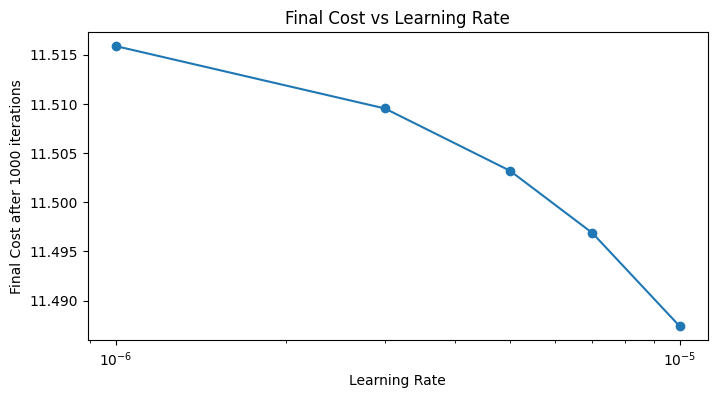

In [109]:
learning_rates = [0.000001, 0.000003, 0.000005, 0.000007, 0.00001]
num_iterations = 1000
final_costs = []

for lr in learning_rates:
    w, b = 0, 0
    costs = []
    diverged = False
    for i in range(num_iterations):
        dc_dw, dc_db = gradient_function(x_train, y_train, w, b)
        w -= lr * dc_dw
        b -= lr * dc_db
        cost = cost_function(x_train, y_train, w, b)
        if np.isnan(cost) or np.isinf(cost):
            diverged = True
            break
        costs.append(cost)
    if diverged:
        final_costs.append(np.nan)
        print(f"Learning rate {lr} diverged.")
    else:
        final_costs.append(costs[-1])
        print(f"Learning rate {lr} final cost: {costs[-1]}")

plt.figure(figsize=(8,4))
plt.plot(learning_rates, final_costs, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Final Cost after 1000 iterations')
plt.title('Final Cost vs Learning Rate')
plt.xscale('log')
plt.show()

Plot regression line on top of the actual data to see how well it fits

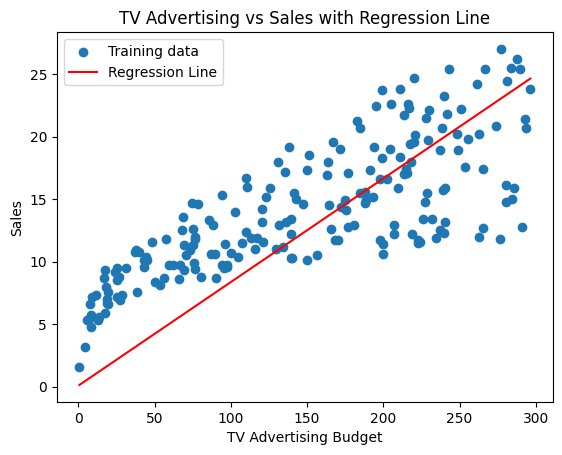

In [110]:
x_vals=np.linspace(min(x_train), max(x_train), 100)
y_vals=final_w * x_vals + final_b

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales with Regression Line')
plt.legend()
plt.show()